# Q11, Q12, Q13

In [161]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

from sklearn.linear_model import LinearRegression as lm
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.tools.eval_measures as eval_measures

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)

In [168]:
#pd.read_csv("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data", delimiter="\t")

prostate = pd.read_csv("prostate.data.txt", delimiter="\t")
prostate = prostate.drop(columns=["Unnamed: 0"])

traindata = prostate[prostate["train"]=="T"]
testdata = prostate[prostate["train"]=="F"]


In [120]:
print(traindata.shape)
traindata.head()

(67, 10)


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [121]:
print(testdata.shape)
testdata.head()


(30, 10)


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
6,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468,F
8,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319,F
9,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319,F
14,1.205971,3.442019,57,-1.386294,0,-0.430783,7,5,1.398717,F
21,2.059239,3.501043,60,1.474763,0,1.348073,7,20,1.658228,F


In [122]:
terms = traindata.columns.drop(['train', 'lpsa'])
print(terms)
X = MS(terms).fit_transform(traindata)
y = traindata['lpsa']


Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45'], dtype='object')


In [123]:
model = sm.OLS(y, X)
results = model.fit()
results

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     16.47
Date:                Mon, 18 Sep 2023   Prob (F-statistic):           2.04e-12
Time:                        10:38:14   Log-Likelihood:                -67.505
No. Observations:                  67   AIC:                             153.0
Df Residuals:                      58   BIC:                             172.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4292      1.554      0.276      0.783      -2.681       3.539
lcavol         0.5765      0.107      5.366      0.000       0.361       0.792
lweight        0.6140      0.223      2.751      0.008       0.167       1.061
age           -0.0190      0.014     -1.396      0.168      -0.046       0.008
lbph           0.1448      0.070      2.056      0.044       0.004       0.286
svi            0.7372      0.299      2.469      0.017       0.140       1.335
lcp           -0.2063      0.111     -1.867      0.067      -0.428       0.015
gleason       -0.0295      0.201     -0.147      0.884      -0.432       0.373
pgg45          0.0095      0.005      1.738      0.088      -0.001       0.020
==============================================================================
Omnibus:                        0.825   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.662   Jarque-Bera (JB):                0.389
Skew:                          -0.164   Prob(JB):                        0.823
Kurtosis:                       3.178   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [132]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
reg
# reg.intercept_
# reg.coef_
# reg.score(X, y)

LinearRegression()

In [125]:
X_test = MS(terms).fit_transform(testdata)
y_test = testdata['lpsa']

print(X_test.shape)
#print(X_test)

(30, 9)


In [130]:
#print(y_test)
#y_test_pred = results.predict(X_test)
y_test_pred = reg.predict(X_test)
print(results.predict(X_test))
print(reg.predict(X_test))

6     1.969038
8     1.169956
9     1.261179
14    1.883759
21    2.544319
24    1.932754
25    2.042336
27    1.830916
31    1.991159
33    1.323471
35    2.938431
41    2.203144
43    2.166421
47    2.794562
48    2.674669
49    2.180573
52    2.402111
53    3.023516
54    3.211223
56    1.384415
61    3.417519
63    3.707417
64    2.541183
65    2.729697
72    2.640556
73    3.480600
79    3.171363
83    3.292349
94    3.118897
96    3.763840
dtype: float64
[1.96903844 1.16995577 1.26117929 1.88375914 2.54431886 1.93275402
 2.04233571 1.83091625 1.99115929 1.32347076 2.93843111 2.20314404
 2.166421   2.79456237 2.67466879 2.18057291 2.40211068 3.02351576
 3.21122283 1.38441459 3.41751878 3.70741749 2.54118337 2.72969658
 2.64055575 3.48060024 3.17136269 3.2923494  3.11889686 3.76383999]


In [129]:
RSS = sum((y_test - y_test_pred)**2)
print("RSS=", round(RSS, 2))

RSS= 15.64


In [115]:
print(mean_squared_error(y_test, y_test_pred)*30)

print(eval_measures.mse(y_test, y_test_pred)*30)

15.638220165227962
15.638220165227962


In [183]:
for m in range(1,len(X.columns) + 1):
    print("-------")
    #a = itertools.combinations(X.columns, m)
    for x in itertools.combinations(X.columns, m):
        print(x)

-------
('intercept',)
('lcavol',)
('lweight',)
('age',)
('lbph',)
('svi',)
('lcp',)
('gleason',)
('pgg45',)
-------
('intercept', 'lcavol')
('intercept', 'lweight')
('intercept', 'age')
('intercept', 'lbph')
('intercept', 'svi')
('intercept', 'lcp')
('intercept', 'gleason')
('intercept', 'pgg45')
('lcavol', 'lweight')
('lcavol', 'age')
('lcavol', 'lbph')
('lcavol', 'svi')
('lcavol', 'lcp')
('lcavol', 'gleason')
('lcavol', 'pgg45')
('lweight', 'age')
('lweight', 'lbph')
('lweight', 'svi')
('lweight', 'lcp')
('lweight', 'gleason')
('lweight', 'pgg45')
('age', 'lbph')
('age', 'svi')
('age', 'lcp')
('age', 'gleason')
('age', 'pgg45')
('lbph', 'svi')
('lbph', 'lcp')
('lbph', 'gleason')
('lbph', 'pgg45')
('svi', 'lcp')
('svi', 'gleason')
('svi', 'pgg45')
('lcp', 'gleason')
('lcp', 'pgg45')
('gleason', 'pgg45')
-------
('intercept', 'lcavol', 'lweight')
('intercept', 'lcavol', 'age')
('intercept', 'lcavol', 'lbph')
('intercept', 'lcavol', 'svi')
('intercept', 'lcavol', 'lcp')
('intercept', '

In [133]:
def bestsubset(X, Y):
    RSS_list, numb_features, feature_list = [], [], []

    for m in range(1,len(X.columns) + 1):
        best_RSS = np.inf
        
        # Loop over all possible combinations: from n choose m (where n is the number of columns)
        for combo in itertools.combinations(X.columns, m):
            tmp_X = X[list(combo)]
            tmp_model = lm()
            tmp_model.fit(tmp_X, Y)
            tmp_RSS = mean_squared_error(Y, tmp_model.predict(tmp_X)) * len(Y)
            
            if tmp_RSS < best_RSS:
                best_RSS = tmp_RSS
                best_varset = combo
        
        RSS_list.append(best_RSS)                  
        feature_list.append(best_varset)          
        numb_features.append(len(best_varset))   
            
    return pd.DataFrame({'msize': numb_features,
                       'RSS': RSS_list, 
                       'features':feature_list}) 

In [216]:
n*np.log(29.43/n)+2*7

-41.11942982875417

In [159]:
Y=y
rs = bestsubset(X, Y)
display(rs)

,msize,RSS,features
0,1,44.528583,"(lcavol,)"
1,2,37.091846,"(lcavol, lweight)"
2,3,34.907749,"(lcavol, lweight, svi)"
3,4,32.814995,"(lcavol, lweight, lbph, svi)"
4,5,32.069447,"(lcavol, lweight, lbph, svi, pgg45)"
5,6,30.539778,"(lcavol, lweight, lbph, svi, lcp, pgg45)"
6,7,29.437300,"(lcavol, lweight, age, lbph, svi, lcp, pgg45)"
7,8,29.426384,"(lcavol, lweight, age, lbph, svi, lcp, gleason, pgg45)"
8,9,29.426384,"(intercept, lcavol, lweight, age, lbph, svi, lcp, gleason, pgg45)"


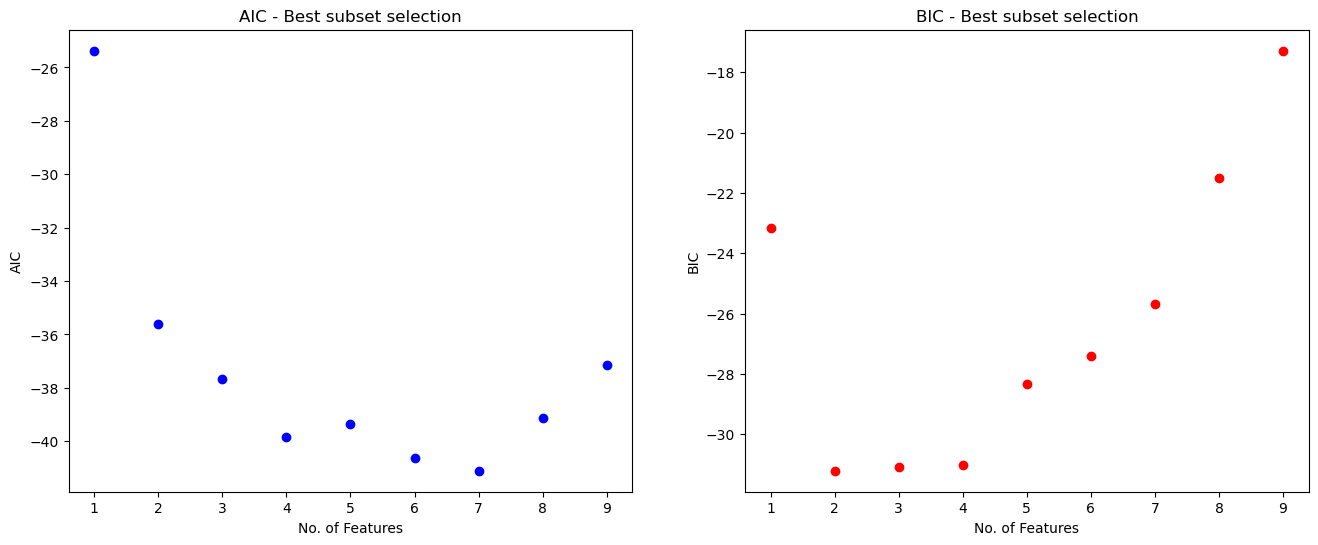

In [166]:
n = len(Y)
Aic = n*np.log(rs.RSS/n) + 2*rs.msize
Bic = n*np.log(rs.RSS/n) + rs.msize*np.log(n)

fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(rs.msize, Aic, alpha = 1, color = 'blue' )
ax.set_xlabel('No. of Features')
ax.set_ylabel('AIC')
ax.set_title('AIC - Best subset selection')


ax = fig.add_subplot(1, 2, 2)
ax.scatter(rs.msize, Bic, alpha = .5, color = 'red' )
ax.set_xlabel('No. of Features')
ax.set_ylabel('BIC')
ax.set_title('BIC - Best subset selection')

plt.show()


In [178]:
# print(Aic)
# print(Bic)
# print(rs.RSS)

#pd.DataFrame(np.array([rs.RSS, Aic, Bic]), columns=["RSS", "Aic", "Bic"])
pd.DataFrame(data={"p" : rs.msize, "RSS" : rs.RSS, "Aic":Aic, "Bic":Bic})
#print(rs.msize)

,p,RSS,Aic,Bic
0,1,44.528583,-25.373609,-23.168916
1,2,37.091846,-35.616796,-31.207411
2,3,34.907749,-37.682914,-31.068836
3,4,32.814995,-39.825072,-31.006302
4,5,32.069447,-39.364852,-28.341389
5,6,30.539778,-40.639393,-27.411237
6,7,29.437300,-41.102812,-25.669964
7,8,29.426384,-39.127661,-21.490120
8,9,29.426384,-37.127661,-17.285428


In [184]:
def bestsubset_3(X, Y):
    RSS_dict, numb_features_dict, feature_list_dict = {}, {}, {}
    
    for m in range(1, len(X.columns) + 1):
        best_RSS = []
        
        # Loop over all possible combinations: from n choose m (where n is the number of columns)
        for combo in itertools.combinations(X.columns, m):
            tmp_X = X[list(combo)]
            tmp_model = lm()
            tmp_model.fit(tmp_X, Y)
            tmp_RSS = mean_squared_error(Y, tmp_model.predict(tmp_X)) * len(Y)
            
            # Keep track of the top 3 models
            best_RSS.append((tmp_RSS, combo))
            best_RSS = sorted(best_RSS)[:3]
            
        # Store the best RSS and corresponding features for each m
        RSS_dict[m] = [x[0] for x in best_RSS]
        feature_list_dict[m] = [x[1] for x in best_RSS]
        numb_features_dict[m] = [len(x[1]) for x in best_RSS]
        
    return pd.DataFrame({'msize': numb_features_dict,
                         'RSS': RSS_dict,
                         'features': feature_list_dict})

In [188]:
rs_3 = bestsubset_3(X, Y)
n = len(Y)


# Unpack the lists into individual data points
msize_flat = []
Aic_flat = []
Bic_flat = []
features_flat = []

for index, row in rs_3.iterrows():
    msize_list = row['msize']
    RSS_list = row['RSS']
    features_list = row['features']  
    
    for msize, RSS, feat in zip(msize_list, RSS_list, features_list):
        Aic_value = n * np.log(RSS / n) + 2 * msize
        Bic_value = n * np.log(RSS / n) + msize * np.log(n)
        
        msize_flat.append(msize)
        Aic_flat.append(Aic_value)
        Bic_flat.append(Bic_value)
        features_flat.append(feat)

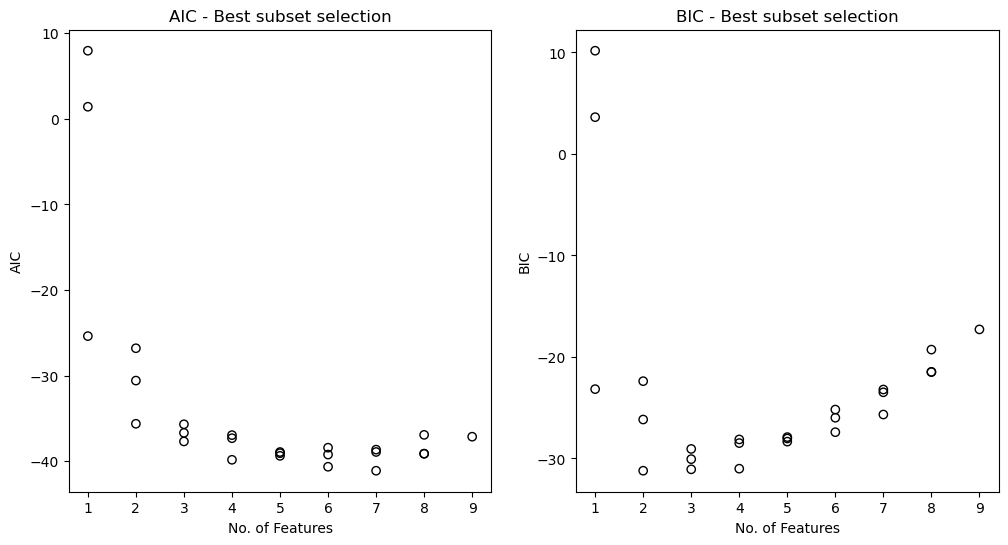

In [189]:
fig = plt.figure(figsize=(12, 6))

# Plot for AIC
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(msize_flat, Aic_flat, alpha=1, facecolors='none', edgecolors='black')
ax1.set_xlabel('No. of Features')
ax1.set_ylabel('AIC')
ax1.set_title('AIC - Best subset selection')


# Plot for BIC
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(msize_flat, Bic_flat, alpha=1, facecolors='none', edgecolors='black')
ax2.set_xlabel('No. of Features')
ax2.set_ylabel('BIC')
ax2.set_title('BIC - Best subset selection')

plt.show()

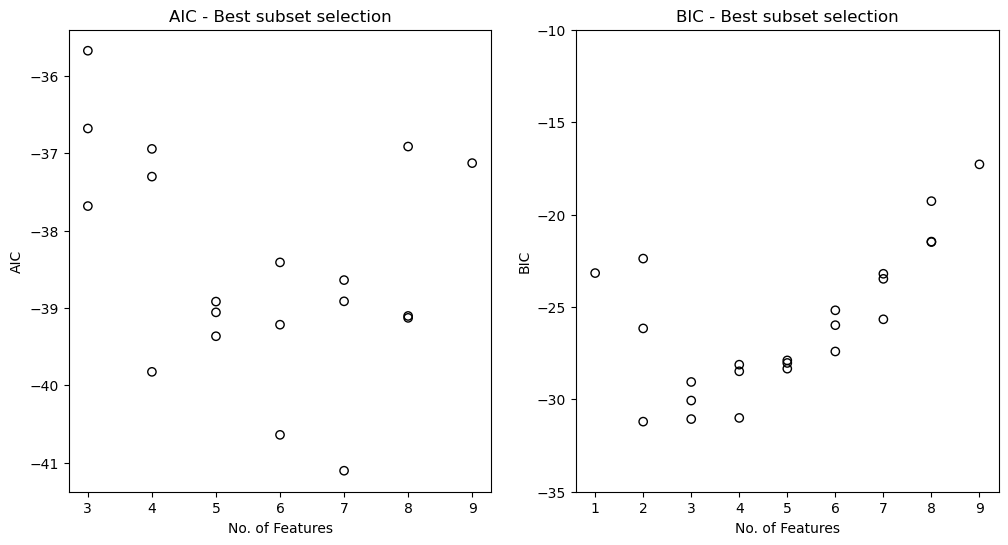

In [203]:
msize_filtered = [m for i, m in enumerate(msize_flat) if m > 2]
Aic_filtered = [a for i, a in enumerate(Aic_flat) if msize_flat[i] > 2]
Bic_filtered = [b for i, b in enumerate(Bic_flat) if msize_flat[i] > 2]

fig = plt.figure(figsize=(12, 6))

# Plot for AIC
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(msize_filtered, Aic_filtered, alpha=1, facecolors='none', edgecolors='black')
ax1.set_xlabel('No. of Features')
ax1.set_ylabel('AIC')
ax1.set_title('AIC - Best subset selection')
#ax1.set_ylim(-67, -62)


# Plot for BIC
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(msize_flat, Bic_flat, alpha=1, facecolors='none', edgecolors='black')
ax2.set_xlabel('No. of Features')
ax2.set_ylabel('BIC')
ax2.set_title('BIC - Best subset selection')
#ax2.set_ylim(-60, -50)
ax2.set_ylim(-35, -10)

plt.show()

In [204]:
df = pd.DataFrame({
    'msize': msize_flat,
    'Aic': Aic_flat,
    'Bic': Bic_flat,
    'features': features_flat
})

# Sort the DataFrame by Aic to get the top 3 features
top3_Aic = df.sort_values(by='Aic').head(3)
print(top3_Aic[['msize','features']].to_string(index=False))

 msize                                      features
     7 (lcavol, lweight, age, lbph, svi, lcp, pgg45)
     6      (lcavol, lweight, lbph, svi, lcp, pgg45)
     4                  (lcavol, lweight, lbph, svi)


In [205]:
top3_Bic = df.sort_values(by='Bic').head(3)
print(top3_Bic[['msize','features']].to_string(index=False))

 msize                     features
     2            (lcavol, lweight)
     3       (lcavol, lweight, svi)
     4 (lcavol, lweight, lbph, svi)


In [206]:
def computeAIC(X, Y, k=2):
    n = len(Y)
    model = lm()
    model.fit(X, Y)
    RSS = mean_squared_error(Y, model.predict(X)) * len(Y)
    return n*np.log(RSS/n) + k*X.shape[1]

def stepAIC(X, Y, features = X.columns, AIC = True):
    AIC_list, action_list, feature_list = [], [], []
    best_AIC = np.inf
    best_action = ' '
                             
    n = len(Y)
    if AIC:
        k = 2
    else:
        k = np.log(n)
    AIC = computeAIC(X[features], Y, k)
    
    while(AIC < best_AIC):                     
        AIC_list.append(AIC)
        feature_list.append(list(features))
        action_list.append(best_action)
        best_AIC = AIC                     
                             
        tmp_AIC_list, tmp_action_list, tmp_feature_list = [], [], []
        
        for p in features:
            tmp_features = features.drop(p)
            tmp_AIC = computeAIC(X[tmp_features], Y, k)
            tmp_AIC_list.append(tmp_AIC)
            tmp_feature_list.append(tmp_features)
            tmp_action_list.append('- ' + p)
        
        remaining_features = [p for p in X.columns if p not in features]
        for p in remaining_features:
            tmp_features = list(features) + [p]
            tmp_AIC = computeAIC(X[tmp_features], Y, k)
            tmp_AIC_list.append(tmp_AIC)
            tmp_feature_list.append(tmp_features) 
            tmp_action_list.append('+ ' + p)
        
        best_model = np.array(tmp_AIC_list).argmin()
        AIC = tmp_AIC_list[best_model]
        features = tmp_feature_list[best_model]
        best_action = tmp_action_list[best_model]
    
    return pd.DataFrame({'AIC': AIC_list,
                         'action': action_list,
                       'features': feature_list})

In [209]:
myout = stepAIC(X, Y, AIC=True)
myout

,AIC,action,features
0,-37.127661,,"[intercept, lcavol, lweight, age, lbph, svi, lcp, gleason, pgg45]"
1,-39.127661,- intercept,"[lcavol, lweight, age, lbph, svi, lcp, gleason, pgg45]"
2,-41.102812,- gleason,"[lcavol, lweight, age, lbph, svi, lcp, pgg45]"


In [208]:
myout = stepAIC(X, Y, AIC=False)
myout

,AIC,action,features
0,-17.285428,,"[intercept, lcavol, lweight, age, lbph, svi, lcp, gleason, pgg45]"
1,-21.490120,- intercept,"[lcavol, lweight, age, lbph, svi, lcp, gleason, pgg45]"
2,-25.669964,- gleason,"[lcavol, lweight, age, lbph, svi, lcp, pgg45]"
3,-27.411237,- age,"[lcavol, lweight, lbph, svi, lcp, pgg45]"
4,-28.341389,- lcp,"[lcavol, lweight, lbph, svi, pgg45]"
5,-31.006302,- pgg45,"[lcavol, lweight, lbph, svi]"
6,-31.068836,- lbph,"[lcavol, lweight, svi]"
7,-31.207411,- svi,"[lcavol, lweight]"
